In [1]:
import numpy as np
from pyscf import gto, scf, dft

from pyscf.tools.dump_mat import dump_rec
from sys import stdout

from pop_scheme import FrgPopulationScheme, FrgMullikenPopulation
from rdft       import Constraints, rdft

mol = gto.Mole()
mol.verbose = 0
mol.atom = '''
O  -1.551007  -0.114520   0.000000
H  -1.934259   0.762503   0.000000
H  -0.599677   0.040712   0.000000
O   1.350625   0.111469   0.000000
H   1.680398  -0.373741  -0.758561
H   1.680398  -0.373741   0.758561
'''

mol.basis = 'sto-3g'
mol.spin   = 0
mol.charge = 0
mol.build()

In [2]:
kk = 4
pop1_list    = np.zeros(kk)
pop2_list    = np.zeros(kk)
pop3_list    = np.zeros(kk)

e_add1_list  = np.zeros(kk)
e_add2_list  = np.zeros(kk)
e_add3_list  = np.zeros(kk)

e0_1_list    = np.zeros(kk)
e0_2_list    = np.zeros(kk)
e0_3_list    = np.zeros(kk)
omega_list   = np.linspace(0,3.0,kk)

mf           = scf.RHF(mol)
mf.conv_tol  = 1e-8
mf.verbose   = 0
mf.max_cycle = 100
mf.kernel()
dm = mf.make_rdm1()

old_get_fock       = mf.get_fock
old_energy_elec    = mf.energy_elec

frg_list            = [[0,1,2],[3,4,5]]
nelec_required_list = [[10.0], [10.0]]
    
for iomega, omega in enumerate(omega_list):
    omega_vals          = [[omega],[0.0]]
    e01, e_add1, dm     = rdft(mf, frg_list, nelec_required_list, omega_vals, dm0=dm, verbose=3, maxiter=200, tol=1e-8,
                              old_energy_elec=old_energy_elec, old_get_fock=old_get_fock)
    pop                 = mf.mulliken_pop(verbose=0)[1]
    pop1                = pop[0]+pop[1]+pop[2]
    pop1_list[iomega]   = pop1
    e_add1_list[iomega] = e_add1
    e0_1_list[iomega]   = e01
    
    print("omega = {: 12.6f}, e01 = {: 12.6f}, e_add1 = {: 12.6f}, pop1 = {: 12.6f}".format(
        omega, e01, e_add1, pop1
    ))

e01 =  -186.598224, e0 =  -186.598224, e_add =     0.000000, e0 - e01 =     0.000000
e01 =  -186.598224, e0 =  -186.598224, e_add =     0.000000, e0 - e01 =     0.000000
cycle= 1 E= -149.935375926425  delta_E= -2.44e-12  |g|= 8.71e-07  |ddm|= 4.24e-06
e01 =  -186.598224, e0 =  -186.598224, e_add =     0.000000, e0 - e01 =     0.000000
converged SCF energy = -149.935375926426
omega =     0.000000, e01 =  -186.598224, e_add1 =     0.000000, pop1 =    -0.025080
e01 =  -186.598224, e0 =  -186.598224, e_add =     0.000000, e0 - e01 =     0.000000
e01 =  -186.598224, e0 =  -186.598224, e_add =     0.000629, e0 - e01 =     0.000000
e01 =  -186.598210, e0 =  -186.598210, e_add =     0.000000, e0 - e01 =     0.000000
e01 =  -186.598210, e0 =  -186.598210, e_add =     0.000562, e0 - e01 =     0.000000
cycle= 1 E= -149.934800363496  delta_E= -5.35e-05  |g|= 0.0012  |ddm|= 0.0126
e01 =  -186.598206, e0 =  -186.598206, e_add =     0.000000, e0 - e01 =     0.000000
e01 =  -186.598206, e0 =  -186.598

Overwritten attributes  get_fock energy_elec  of <class 'pyscf.scf.hf.RHF'>


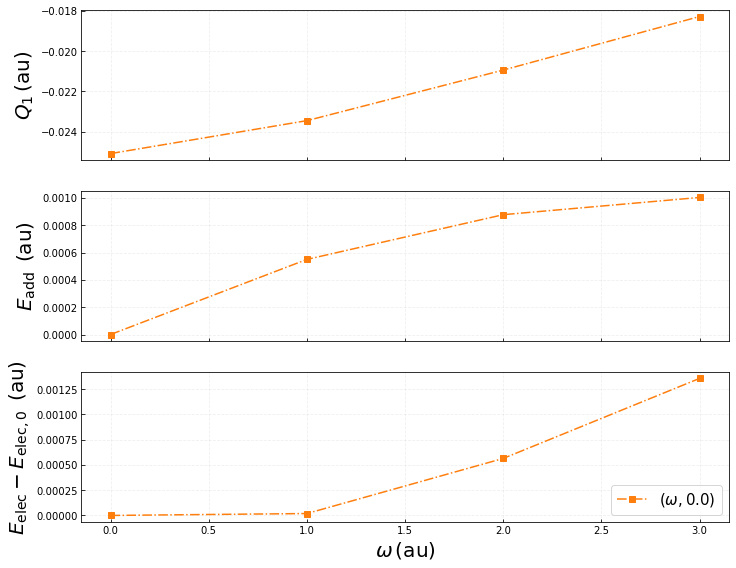

In [3]:
import matplotlib as mpl
from   matplotlib import pyplot as plt

style_dict = {
    '1': dict(linestyle='-.',  marker='s', color='C1',  markersize=6, markevery=1, label=r"$(\omega, 0.0)$"),
    '2': dict(linestyle='-.',  marker='*', color='C2',  markersize=10, markevery=1, label=r"$(2\omega, 0.0)$"),
    '3': dict(linestyle='-.',  marker='o', color='C3',  markersize=6, markevery=1, label=r"$(\omega, \omega)$")
}

params = {
        "axes.titlesize":  10, 
        "axes.labelsize":  20, 
        "legend.fontsize": 15,
        "xtick.labelsize": 10,
        "ytick.labelsize": 10, 
        "xtick.direction":'in', 
        "ytick.direction":'in' 
}
mpl.rcParams.update(**params)

k = kk
fig1, ax1 = plt.subplots(3,1,figsize=(10,8),sharex=True)
fig1.subplots_adjust(left=0.09, bottom=0.1, right=0.99, top=0.99, wspace=0.1)
ax1[0].plot(omega_list[:k], pop1_list[:k], **style_dict['1'])
# ax1[0].plot(omega_list[:k], pop2_list[:k], **style_dict['2'])
# ax1[0].plot(omega_list[:k], pop3_list[:k], **style_dict['3'])

ax1[1].plot(omega_list[:k], e_add1_list[:k], **style_dict['1'])
# ax1[1].plot(omega_list[:k], e_add2_list[:k], **style_dict['2'])
# ax1[1].plot(omega_list[:k], e_add3_list[:k], **style_dict['3'])

ax1[2].plot(omega_list[:k], e0_1_list[:k]-e0_1_list[0], **style_dict['1'])
# ax1[2].plot(omega_list[:k], e0_2_list[:k]-e0_2_list[0], **style_dict['2'])
# ax1[2].plot(omega_list[:k], e0_3_list[:k]-e0_3_list[0], **style_dict['3'])

# ax1[2].plot(omega_list[:k], e0_1_list[:k]-e0_1_list[0]+e_add1_list[:k], **style_dict['1'])
# ax1[2].plot(omega_list[:k], e0_2_list[:k]-e0_2_list[0]+e_add2_list[:k], **style_dict['2'])
# ax1[2].plot(omega_list[:k], e0_3_list[:k]-e0_3_list[0]+e_add3_list[:k], **style_dict['3'])

props = {'ylabel':r'$Q_1\,$(au)'}
ax1[0].grid(linestyle="--", alpha=0.2)
ax1[0].set(**props)

props = {'ylabel':r'$E_\mathrm{add}\,$ (au)'}
ax1[1].grid(linestyle="--", alpha=0.2)
ax1[1].set(**props)

props = {'ylabel':r'$E_\mathrm{elec}-E_\mathrm{elec,0}\,$ (au)', 'xlabel':r'$\omega\,$(au)'}
ax1[2].legend(loc='lower right')
ax1[2].grid(linestyle="--", alpha=0.2)
ax1[2].set(**props);

In [4]:
# -0.025080
# omega =    14.769231, e01 =  -186.597176, e_add1 =     0.002817, pop1 =    -0.013810, e01 =  -186.596254, e_add2 =     0.003029, pop2 =    -0.010126

In [5]:
0.002817/0.003029

0.9300099042588313

In [6]:
(-0.010126+0.2580)/(-0.013810+0.025080)

21.9941437444543

In [7]:
(-0.010126)/(-0.013810)

0.7332367849384503

In [8]:
(-0.013810)/(-0.010126)

1.3638159194153663

In [9]:
0.000439*4

0.001756